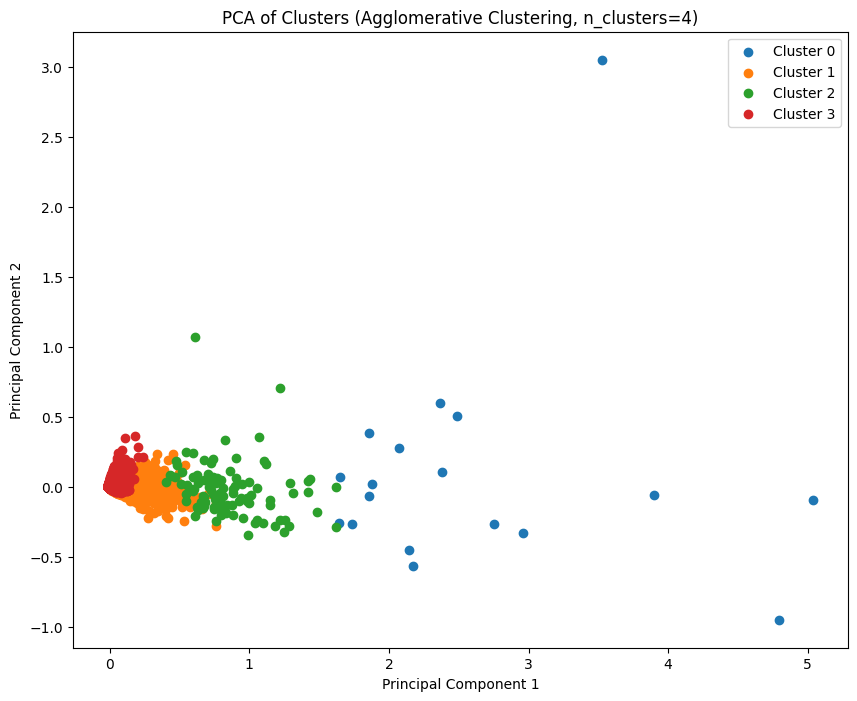

n_clusters: 4
Silhouette Score: 0.8551001319624854
Davies-Bouldin Index: 1.1550465595162696



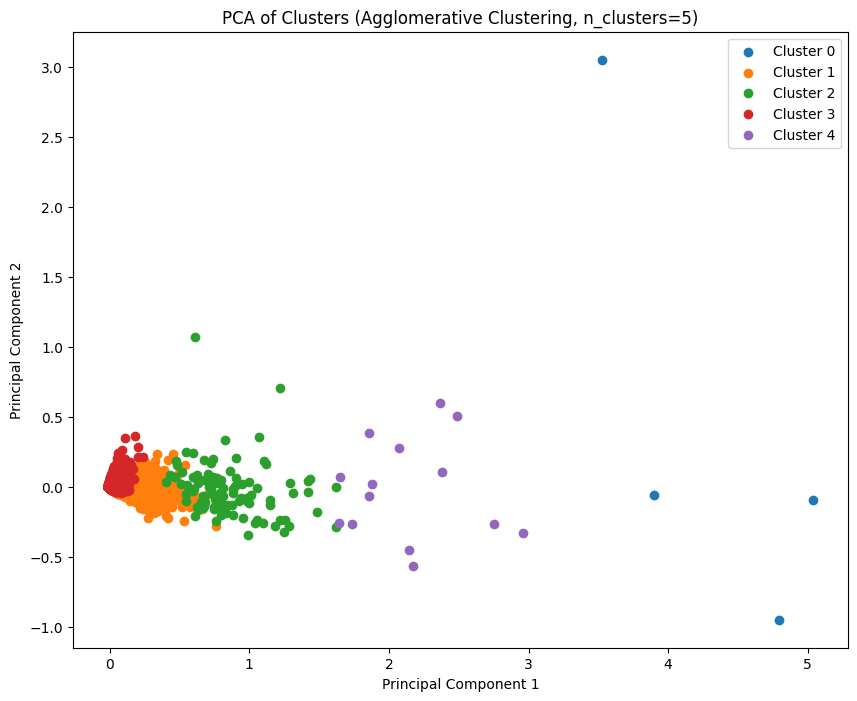

n_clusters: 5
Silhouette Score: 0.8551277884048981
Davies-Bouldin Index: 1.1585047767970806



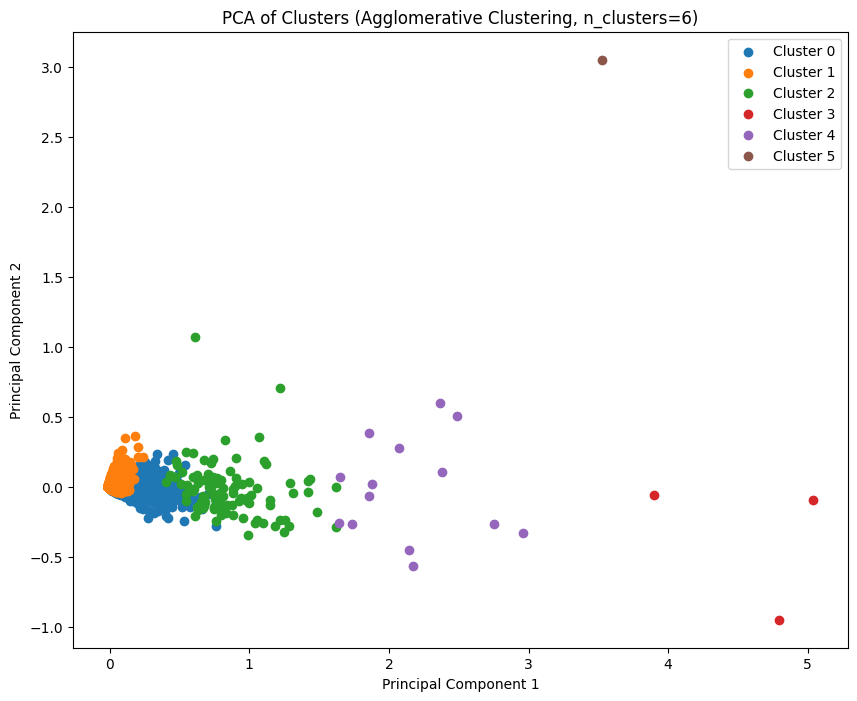

n_clusters: 6
Silhouette Score: 0.8551400390586782
Davies-Bouldin Index: 0.9405220425787094



In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the data
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]
df_clean = df_features.dropna(subset=category_columns)

# Number of clusters to evaluate
n_clusters_values = [4, 5, 6]

for n_clusters in n_clusters_values:
    # Initialize and fit the Agglomerative Clustering model
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    df_clean['Cluster'] = agglomerative.fit_predict(df_clean[category_columns])

    # Save the results
    df_clean.to_csv(f'df_features_with_clusters_agglomerative_{n_clusters}.csv', index=False)

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    pca_dims = pca.fit_transform(df_clean[category_columns])
    pca_dims = pd.DataFrame(pca_dims, columns=['PC1', 'PC2'])

    # Plot the clusters
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    for cluster in np.unique(df_clean['Cluster']):
        ix = df_clean['Cluster'] == cluster
        ax.scatter(x=pca_dims.loc[ix, 'PC1'], y=pca_dims.loc[ix, 'PC2'], label=f'Cluster {cluster}')
    ax.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of Clusters (Agglomerative Clustering, n_clusters={n_clusters})')
    plt.show()

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(df_clean[category_columns], df_clean['Cluster'])
    davies_bouldin = davies_bouldin_score(df_clean[category_columns], df_clean['Cluster'])

    print(f'n_clusters: {n_clusters}')
    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {davies_bouldin}\n')

Text(0, 0.5, 'Distance')

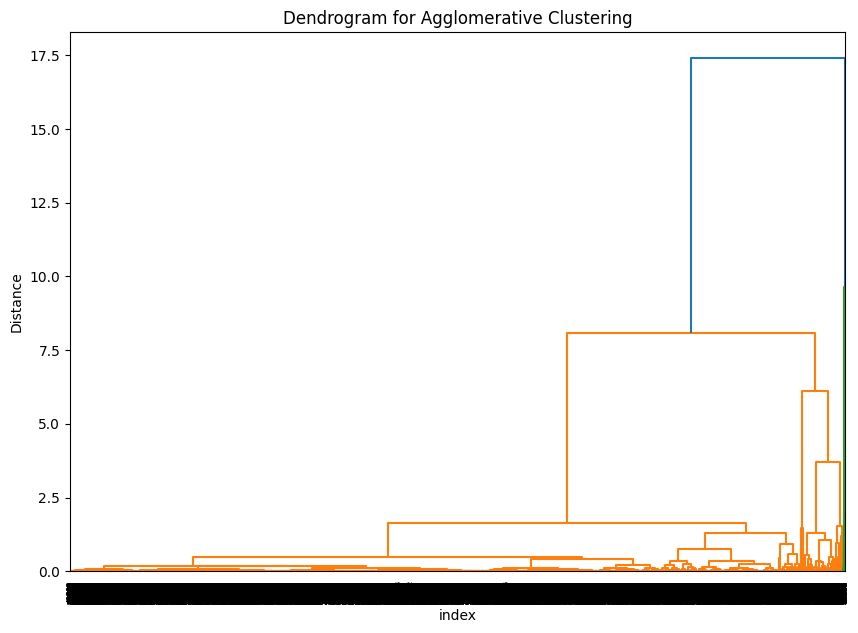

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]  # Assuming the first column is an identifier

# Normalize the data
scaler = MinMaxScaler()
df_features[category_columns] = scaler.fit_transform(df_features[category_columns])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_features[category_columns])

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
df_features['Agglo_Cluster'] = agglo.fit_predict(reduced_data)

# Create the linkage matrix
Z = linkage(reduced_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('index')
plt.ylabel('Distance')